# fundamental concepts of tensors usig tensorflow
* intro to tensors
* information from tensors
* manipulating tensors
* tensors and numpy
* using @tf.function ( a way to speed up regular python functions)
* using gpus with tensorflow (or tpus) for faster numerical computaion

*italicized text*# intro to tensors

# import tensorflow
import tensorflow as tf
print(tf.__version__) # for checking the version of tensorflow

In [1]:
## create tensors with tf.constant()
import tensorflow as tf
scalar  = tf.constant(7)
scalar

# commands - ctrl + MM  - markdown cell, ctrl + my - code cell
#            ctrl + MB - new cell
#            ctrl + shift + space - info about a command

## tensorflow has inbuilt modules which are able to read in data sorces such as how many diiferent images 
## and automatically convert them into tensors and later on the neural network model 
## will process these tensors

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [2]:
# check no of dimensions of a tensor ( ndim stands for no of dimensions)
scalar.ndim

0

In [3]:
# create a vector
vector = tf.constant([10, 10])
vector


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [4]:
# check dimensions of a vector
vector.ndim

1

In [5]:

# create a matrix ( has more than 1 dimension)
import tensorflow as tf
matrix = tf.constant([[11, 7],
                      [7, 11]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7, 11]])>

In [6]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# create a matrix ( has more than 1 dimension)
import tensorflow as tf
matrix = tf.constant([[11, 7],
                      [7, 11]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7, 11]])>

In [9]:
import tensorflw as tf
print(tf._version_)

ModuleNotFoundError: No module named 'tensorflw'

In [10]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [11]:
# create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [12]:
# check the number of dimnsions of a tensor ( ndim stands for number of dimensions)
scalar.ndim

0

In [13]:
# create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [14]:
# check the dimnsion of our vector
vector.ndim


1

In [15]:
# create a matrix(has more tahn 1 dimension)
matrix = tf.constant([[10, 7],
                    [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [16]:
#create anothe rmatrix
another_matrix = tf.constant([[10., 7.],
                             [3., 2.],
                             [8., 9.]], dtype=tf.float16)  # specify the data type with the dytpe parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [17]:
another_matrix.ndim

2

In [18]:
total no of dimensions = no of elements in shape

SyntaxError: invalid syntax (<ipython-input-18-4ed3bdee1d9a>, line 1)

In [19]:
#how to increase the number ofdiensions
# lets create a tensor
# a tensor
tensor = tf.constant([[[1, 2, 3],
                     [4, 5, 6]],
                     [[7, 8, 9],
                    [10, 11, 12]],
                     [[13, 14, 15],
                     [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [20]:
tensor.ndim

3

# what we've created so far

* Scalar : a single number
* Vector : a number with direction (eg wind speed and direction)
* matrix : a 2-dimensional array of numbers
* Tenso : an n-dimensional array of numbers ( when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)



In [21]:
#creating tensors with tf.variable
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [22]:
#lets try change one of the elements in our changeable vector
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [23]:
# trying .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [24]:
# try to change unchangeable tensor
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## creating random tensors
random tensors are tensors of some arbitrary size which contains random numbers

In [25]:
# create two random tensors
random_1= tf.random.Generator.from_seed(4) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_1
random_2 = tf.random.Generator.from_seed(4)
random_2 = random_2.normal(shape=(3, 2))
random_1, random_2, random_1 == random_2

# they have come from a normal distrbution

# they are pseudo random numbers
# settig the seed -> create randm numbers but flavour them with x 

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 1.0019137 ,  0.6735137 ],
        [ 0.06987712, -1.4077919 ],
        [ 1.0278524 ,  0.27974114]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 1.0019137 ,  0.6735137 ],
        [ 0.06987712, -1.4077919 ],
        [ 1.0278524 ,  0.27974114]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

####  shuffle the order of elements in a tensor

In [26]:
# shuffle a tensor ( valuable for when you  want to shuffle your data so that inherent order does not affect learning)
not_shuffled = tf.constant([[10, 7],
                          [3, 4],
                          [2, 5]])
not_shuffled.ndim

# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled)  # shuffles elements along its first dimension

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [27]:
# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled)  # shuffles elements along its first dimension

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]])>

In [28]:
# using seed
# shuffle our non-shffled tensor
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]])>

In [29]:
tf.random.shuffle(not_shuffled, seed = 42)  # gives differen result

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]])>

In [30]:
tf.random.set_seed(42) 
tf.random.shuffle(not_shuffled, seed = 42)  # gives same order

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [31]:
# read through tensorflow documentation on random seed generator
# write 5 random tansors and shuffle them\

# operational and global level random seed

# main aim to shuffle the order of tensors is --> for classification neural networks -> any kind of images first may learn only one type of image

In [32]:
tf.random.shuffle(not_shuffled, seed = 42)  3 we get a different order each time

SyntaxError: invalid syntax (<ipython-input-32-b66b7616e12f>, line 1)

In [33]:
# using global radom seed 
tf.random.set_seed(42) # --> gives same order
tf.random.shuffle(not_shuffled, seed = 42)  

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

### if we want our shuffled tensors to be in the same order , we have to use the global level random seed as well as the operational level random seed

### other ways to make tensors

In [34]:
# create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [35]:
# create a tensor of all zeroes
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [36]:
### turn numpy arrays into tensors

main differencce NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU ( must faster for numerical computing)

SyntaxError: invalid syntax (<ipython-input-36-7d4003424638>, line 3)

In [37]:
# you can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype = np.int32) # create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector)  # non-capital for vector


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [38]:
A = tf.constant(numpy_A)
A

# converted NumPy rray into a tensor

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [39]:
# changing shape --> its shape is 24 if we want it into a 3-dimensional tensor
2*3*4
A = tf.constant(numpy_A, shape = (3, 8))  # 3 rows and 8 elements in one column
A  # this would be a tensor becoz it has got more than 1 dimension 
B= tf.constant(numpy_A)  # this is a vector
A, B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]])>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])>)

## Getting informatin from tensors

In [40]:
numpy_A.ndim

1

In [41]:
A.ndim

2

NumPy arrays are a very common form of representing numerical data --> can be converted into tensors

basic difference beteween numpy array and tensorflow tensor --> although they may store the same information here 
a tensor formmat can run on a gpu and finding pattrens in numerial data.


### want to get attribute s of tensors

When dealing with tensors want to be aware of the following attributes ->
* Shape - the length of each of the dimensions of a tensor
* Rank - the number of tensor dimensions . A scalar has rank 0, a vector has rank 1, a matrix has rank 2 , a tensor has rank n
* Axis or dimension - a particular dimension of a tensor --> tensor[0], tensor[:, 1]...
* Size - the total number of items in a tensor tf.size(tensor)

In [42]:
# Create a rank 4 matrix --> 4 dimensions
rank_4_tensor = tf.zeros(shape = [2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

# when you pass a tensor into a neural network --> has to be in a certain shape and output also has to be in a certain shape

In [43]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [44]:
rank_4_tensor[0][1]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [45]:
rank_4_tensor[0][1][3]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [46]:
# rank_4_tensor[0][1][4] -->gives error

In [47]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [48]:
# fget various attributes of our tensors
print("datatype of every element", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("elemnts along the 0 axis:",rank_4_tensor.shape[0])
print("elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor))

datatype of every element <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
elemnts along the 0 axis: 2
elements along the last axis: 5
Total number of elemnts in our tensor: tf.Tensor(120, shape=(), dtype=int32)


In [49]:

print("datatype of every element", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("elemnts along the 0 axis:",rank_4_tensor.shape[0])
print("elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor))
print("Total number of elemnts in our tensor:", tf.size(rank_4_tensor).numpy())

datatype of every element <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
elemnts along the 0 axis: 2
elements along the last axis: 5
Total number of elemnts in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elemnts in our tensor: 120


### Indexing tensors

Tensors can be indexed like python lists

In [50]:
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [51]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2] # we seaparate the dimensions by commas

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [52]:
some_list[:1]

[1]

In [53]:
# get the first element from each dimension frome each index except for the final one
rank_4_tensor[:1, :1, :1,]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [54]:
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [55]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [56]:
rank_4_tensor[:, :1, :1, :1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [57]:
# create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                           [3, 4]])
rank_2_tensor
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [58]:
some_list, some_list[-1], some_list[:-1]

([1, 2, 3, 4], 4, [1, 2, 3])

In [59]:
# get the last item of eah row of rank_2_matrix
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4])>

In [60]:
rank_2_tensor[:, :-1]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[10],
       [ 3]])>

In [61]:
# if we want to add an extra dimension to this tensor
# we may need to alter the size of our tensors so that their shape line up

# add in extra dimension to our rank 2 tensor but information should be same
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [62]:
rank_3_tensor = rank_2_tensor[:, :, tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [63]:
# alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [64]:
tf.expand_dims(rank_2_tensor, axis=1) #extra dimension u=in the middle

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]])>

In [65]:
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]])>

In [66]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

# how the numbers are stored changes just in changing dimension

### manipulating tensors (tensor operations)

In [67]:
# you can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3,4]])
tensor + 10, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[20, 17],
        [13, 14]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]])>)

In [68]:
tensor+=20
tensor
tensor-=20

In [69]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [70]:
tensor -10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]])>

In [71]:
# we can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [72]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

***Matrix Multiplication
In machine learning, matrix multiplication is one of the most common tensor operations
1. the inner dimnsions must match
2. the resulting matrix has shape of the outer dimensions

In [73]:
# matrix multiplication in tensorflow
print(tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


In [74]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [75]:
tensor * tensor  # it is element wise

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]])>

In [76]:
# matricx multiplication with python operator "@"
tensor @ tensor  used for matricx multiplication

SyntaxError: invalid syntax (<ipython-input-76-4b7b1ef36c31>, line 2)

In [77]:
tensor.shape

TensorShape([2, 2])

In [78]:
# with different shapes
# create a tensor (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                [5, 6]])
Y = tf.constant([[7, 8],
                 [9, 10],
                [11, 12]])
X*Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7, 16],
       [27, 40],
       [55, 72]])>

In [79]:
X , Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [80]:
#Matrix multilpy tensors
X @ Y
tf.multiply(X, Y)

InvalidArgumentError: In[0] mismatch In[1] shape: 2 vs. 3: [3,2] [3,2] 0 0 [Op:MatMul]

In [81]:
# have to change the shape of either matrix
# or cretae new matrice sof same shape

# lets change the shape of y
tf.reshape(Y, shape = (2,3)), Y

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [82]:
X.shape, tf.reshape(Y, shape = (2, 3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [83]:
# try to multiply X by reshaped y
X @ tf.reshape(Y, shape = (2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [84]:
tf.matmul(X, tf.reshape(Y, shape = (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [85]:
# reshaping X
X.shape, Y.shape, tf.matmul(tf.reshape(X, shape=(2, 3)), Y)

(TensorShape([3, 2]),
 TensorShape([3, 2]),
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 58,  64],
        [139, 154]])>)

In [86]:
# can do the same wwith transpose
X, tf.transpose(X), tf.reshape(X ,shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]])>)

In [87]:
# transpose --> flips the axes rather than shuffling elements of tensors

In [88]:
# try matricx mult with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

** the dot product
matricx multis also referred to as the dot product
can perform mat mult using -->
* tf.matmul()
* tf.tensordot()

In [89]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [90]:
# perform the dot product on X and Y ( requires X or Y to be transposed)
# transposiing( flipping the axis) results in different outputs rather than reshaping ( reshuffling)

tf.tensordot(tf.transpose(X), Y, axes = 1), tf.matmul(tf.transpose(X), Y)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]])>)

In [91]:
# perfor mat mult bet x and y(transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [92]:
# perform mat ult bet x and y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [93]:
# check the values of y, reshape Y, transposed Y
print("Norml Y\n", Y)
print("Y reshaped to (2, 3) : ")
print(tf.reshape(Y, (2, 3)), "\n")
print("Y transposed")
print(tf.transpose(Y))

Norml Y
 tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32)
Y reshaped to (2, 3) : 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [94]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [95]:
# which one to use - transpose or reshape

Generally , when performing matrix mltiplication on two tensors , and one of the axes does'nt line up, use transpose, rather than reshape to satisfy multiplication rules

In [96]:
### changing the dataype of a tensor
# generally default datatpe of tensors will be int32

# create a tensor with dafault datatype ( float 32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [97]:
C = tf.constant(([7, 10]))
C.dtype

tf.int32

In [98]:
# change from float 32 to float 16
D = tf.cast(B, dtype = tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [99]:
# change fro int32 to float32
E = tf.cast(C , dtype = tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [100]:
E_float16  = tf.cast(E, dtype = tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

## Tensors Aggregating

Aggregating tensors means condensing them from multiple values down to a smaller amount of values.

In [101]:
# ---> get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>

In [102]:
tf.abs(D) # for getting absolute values

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>

other forms of aggregation

* get the minimm
* get the maximum
* get the mean ofa tensor
* get the sum of a tensor

In [103]:
# creating a radom tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([45, 60, 86, 57, 28, 69, 15, 66, 91, 39, 28,  7, 21, 49,  6, 28, 61,
       21, 43, 32, 83, 16, 93, 78,  0, 22, 57, 88, 42, 62, 12, 86, 82, 50,
       65, 31, 44, 19,  7, 29, 68, 58, 98, 57, 55, 16, 99, 94, 87,  0])>

In [104]:
tf.size(E), E.ndim, E.shape

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, 1, TensorShape([50]))

In [105]:
# minimum of a tensor
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [106]:
# in numPy
np.min(E)

0

In [107]:
# maximum 
tf.reduce_max(E), np.max(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=99>, 99)

In [108]:
# mean
tf.reduce_mean(E), np.mean(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=49>, 49.0)

In [109]:
tf.reduce_sum(E), np.sum(E)

(<tf.Tensor: shape=(), dtype=int32, numpy=2450>, 2450)

In [116]:
#pip install tensorlflow_probability

In [127]:
## tfp means tensorflow probability
## import tensorflow_probability as tfp

## variance and stadard deviation only work with real or complex input
# --> hence convert E to real type
# or
# to find variance of tensor , we need access to tensorflow_probability
#import tensorflow_probability as tfp
# tfp.stats.variance(E)

tf.math.reduce_variance(tf.cast(E, dtype = tf.float32)), np.var(E)

(<tf.Tensor: shape=(), dtype=float32, numpy=842.12>, 842.12)

In [128]:
tf.math.reduce_std(E), np.std(E), E.dtype

(<tf.Tensor: shape=(), dtype=float32, numpy=29.019304>, 29.019304, tf.float32)

## Find the positional maximum and minimum

#### used in neural network output prediction probabilities
#### representtion outputs are referred to as prediction probabilities

In [136]:
# create tensor for finding poitional min and max
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [137]:
# at which position max elemnt occurs --> find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [138]:
# find the largest value using the index
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [139]:
# finding the max value value of
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [140]:
# check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [141]:
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [143]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [145]:
tf.reduce_min(F) == F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## squeezing our tensor --> removing all single dimensions

In [148]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [149]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [152]:
G.squeezed = tf.squeeze(G)  # removes dimensions of size 1 from shape of  atensor
G.shape, G.squeezed.shape ## gets rid of extra dimensions

(TensorShape([1, 1, 1, 1, 50]), TensorShape([50]))

### one hot encoding tensors

In [160]:
## see ml mastery for this 
# it is a form of numerical encoding
# can one hot encode words and pass those as tensors to neural networks

# create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue, purple



# one hot encode this list of indices ---->
tf.one_hot(some_list, depth = 4)  # depth --> usually no of columns

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [162]:
# using custom values for one-hot encoding
tf.one_hot(some_list, depth = 4, on_value = 'Y', off_value = 'N')   # using on_value and of_value

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Y', b'N', b'N', b'N'],
       [b'N', b'Y', b'N', b'N'],
       [b'N', b'N', b'Y', b'N'],
       [b'N', b'N', b'N', b'Y']], dtype=object)>

#### more math operations 
##### squaring, log, square root

In [164]:
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [165]:
tf.square(H) ## squaring

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [170]:
# tf.sqrt(H) --> gives error

In [168]:
tf.sqrt(tf.cast(H, dtype = tf.float32)) # find root 
# sqrt requires non-int type


<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [176]:
tf.math.log(tf.cast(H, dtype = tf.float32))  #finding log

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### NumPy(fundamental package for scientific computing with python) and tensorflow

**  tensorflow interacts beautifully with NumPy arrays

In [182]:
# create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J, type(J)

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>,
 tensorflow.python.framework.ops.EagerTensor)

In [183]:
# convert from tensor to NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [184]:
# convert tensor J to  anumpy array
J.numpy(), type(J.numpy())


(array([ 3.,  7., 10.]), numpy.ndarray)

In [187]:
## useful in some of the functionalities
J = tf.constant([3.])
J.numpy()[0]

3.0

In [190]:
## default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])  
numpy_J.dtype, tensor_J.dtype

# for tensor --> default type is float 32
# for numpy array --> default type is float 64
# NumPy - fundamental pav=ckage for scientific computing in python

(tf.float64, tf.float32)

In [191]:
# regression --> predicting a number
# other -> trying to predict the corners in a object detection problem


# Regression inputs and outputs
# some neural networks may have 1000 hidden layers

# architecture of a regression model - 
# hyperparameter -> a setting that you can change as a data analyst

# define our loss function --> how wrong our neural network predictions are, how wrong the relationships are 
# optimizer -> infrms neuralnetwork how to improve patterns bet input and output variables , to reduce the loss function
# fit model -> telling model to look at bunch ofdifferent examples in the training datat for 100 laps of the data --> that's what epochs variablee stands for


In [193]:
# regression with neural networls in tensorflow

# predicting a numerical variable based on some other combination of variables

# Importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


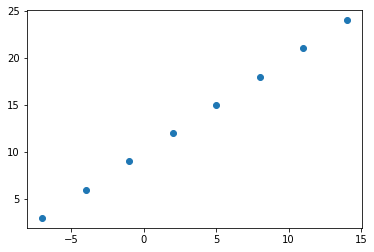

In [196]:
# data to view and fit
# regression model is red line throgh the middle , blue dots are the data points

import numpy as np
import matplotlib.pyplot as plt

# features --> usually denoted by X
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# labels--> usually denoted by y
y = np.array([3.0, 6.0, 9.0, 12.00, 15.0, 18.0, 21.0, 24.0])

# visualize the relationship
plt.scatter(X, y)

# can take X as independent varible, Y as dependent variable



In [197]:
y == X+10 # --> this is the relationship or function bet input features(ind) and our labels(dep)

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [198]:
# input and output shapes

# create a demo tensor for housing price prediction tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [199]:
# in thiis cas we want to use X to predict y
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [200]:
# we want to use one input feature of X to predict one y value
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [201]:
X[0].ndim

0

In [202]:
X[0], y[0]

(-7.0, 3.0)

In [203]:
# model the reltionship between X and y

# turn NumPy arrays into tensors
X = tf.constant(X)
y = tf.shape(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([8])>)

In [205]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))